# PennyLane Codebook - Single Qubit Gates

# X and H

## Codercise-I.4.1-Flipping Bits

A common use of the gate is in initializing the state of a qubit at the beginning of an algorithm. Quite often, we would like our qubits to start in state $\ket {0}$ (which is the default in PennyLane), however there are many cases where we instead would like to start from
Complete the function below by using **qml.PauliX** to initialize the qubit's state to $\ket {0}$ or $\ket {1}$ based on an input flag. Then, use **qml.QubitUnitary** to apply the provided unitary **U**.

In [1]:
import pennylane as qml
from pennylane import numpy as np

In [5]:
dev = qml.device("default.qubit", wires=1)

U = np.array([[1, 1], [1, -1]]) / np.sqrt(2)


@qml.qnode(dev)
def varied_initial_state(state):
    """Complete the function such that we can apply the operation U to
    either |0> or |1> depending on the input argument flag.

    Args:
        state (int): Either 0 or 1. If 1, prepare the qubit in state |1>,
            otherwise, leave it in state 0.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """
    ##################
    # YOUR CODE HERE #
    ##################

    # KEEP THE QUBIT IN |0> OR CHANGE IT TO |1> DEPENDING ON THE state PARAMETER
    if state == 1:
        qml.PauliX(0)

    # APPLY U TO THE STATE
    qml.QubitUnitary(U, wires=0)
    # APPLY U TO THE STATE

    return qml.state()

print(qml.draw(varied_initial_state)(0))
print(qml.draw(varied_initial_state)(1))

0: ──U(M0)─┤  State

M0 = 
[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]
0: ──X──U(M0)─┤  State

M0 = 
[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]


This code will prepare the qubit in the ∣0⟩∣0⟩ or ∣1⟩∣1⟩ state based on the state parameter and then apply the unitary matrix UU to the qubit. The final state of the qubit will be returned as a complex numpy array.

## Codercise-I.4.2-Uniform Superposition

You might have noticed that we've been using this operation a lot:
$$U = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix}$$

This is none other than Hadamard gate, and is typically denoted by H. In PennyLane, it is implemented as **qml.Hadamard**.

The Hadamard gate is special because it can create a uniform superposition of the two states $\ket {0}$ and $\ket {1}$.

Many quantum algorithms rely on us being able to create uniform superpositions, so you'll see the Hadamard gate everywhere!

Complete the quantum function below such that it:

    applies a Hadamard gate to the qubit,
    returns the state of the qubit with qml.state.


In [7]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)
def apply_hadamard():
    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY THE HADAMARD GATE
    qml.Hadamard(wires=0)

    # RETURN THE STATE
    return qml.state()
print(qml.draw(apply_hadamard)())

0: ──H─┤  State


This code will apply the Hadamard gate to the qubit and return the resulting state. When the Hadamard gate is applied to the ∣0⟩∣0⟩ state, the resulting state will be a superposition state 12(∣0⟩+∣1⟩)2
​1​(∣0⟩+∣1⟩).

## Codercise-I.4.3-Combining X and H

Combining your code from codercises I.4.1, and I.4.2, apply the Hadamard gate to both
$\ket {0}$ and $\ket {1}$.What do the two different output states look like? Do you notice anything special about them?

In [8]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_hadamard_to_state(state):
    """Complete the function such that we can apply the Hadamard to
    either |0> or |1> depending on the input argument flag.

    Args:
        state (int): Either 0 or 1. If 1, prepare the qubit in state |1>,
            otherwise, leave it in state 0.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """
    ##################
    # YOUR CODE HERE #
    ##################

    # KEEP THE QUBIT IN |0> OR CHANGE IT TO |1> DEPENDING ON state

    if(state == 1):
        qml.PauliX(0)
        
    # APPLY THE HADAMARD
    qml.Hadamard(0)
    
    # RETURN THE STATE
    return qml.state()

print(qml.draw(apply_hadamard_to_state)(0))
print(qml.draw(apply_hadamard_to_state)(1))

0: ──H─┤  State
0: ──X──H─┤  State


## Codercise-I.4.4-A QNode with X and H

Now let's combine what we've just learned. Create a device with one qubit. Then, write a QNode (from scratch!) that applies the following circuit and returns the state.

![image_circuit](https://assets.cloud.pennylane.ai/codebook/hxh.svg)

Determine its effect on the two basis states. What do you think this operation does?

The signature of your function should be:

In [9]:
##################
# YOUR CODE HERE #
##################

# CREATE A DEVICE
dev = qml.device("default.qubit", wires=1)

# CREATE A QNODE CALLED apply_hxh THAT APPLIES THE CIRCUIT ABOVE
@qml.qnode(dev)
def apply_hxh(state):
    if(state == 1):
        qml.PauliX(0)
    
    qml.Hadamard(0)
    qml.PauliX(0)
    qml.Hadamard(0)
    
    return qml.state()

print(apply_hxh(0))
print(apply_hxh(1))

[1.+0.j 0.+0.j]
[ 0.+0.j -1.+0.j]


# It's Just a Phase

## Codercise-I.5.1-The Pauli Z Gate

The Pauli $Z$ gate is defined by its action on the computational basis states
$\ket {0} --> \ket{0}$
$\ket{1}  --> -\ket{1}$

In PennyLane, you can implement it by calling qml.PauliZ. It has the following circuit element:
![image](https://assets.cloud.pennylane.ai/codebook/z.svg)


Write a QNode that applies **qml.PauliZ** to the $\ket{+}$ state and returns the state. What state is this? How do the measurement probabilities differ from those of the state $\ket{+}$ ??

In [3]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_z_to_plus():
    """Write a circuit that applies PauliZ to the |+> state and returns
    the state.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # CREATE THE |+> STATE
    qml.Hadamard(0)

    # APPLY PAULI Z
    qml.PauliZ(0)

    # RETURN THE STATE
    return qml.state()

print(apply_z_to_plus())

[ 0.70710678+0.j -0.70710678+0.j]


## Codercise-I.5.2-The Z Rotation

In PennyLane, this operation is accessible as **qml.RZ**, which is a parametrized operation, and so we must specify not only a wire, but an angle of rotation:

```qml.RZ(angle, wires=wire)```
Write a QNode that uses qml.RZ to simulate a **qml.PauliZ** operation and return the state. Apply it to the  state to check your work.

In [7]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def fake_z():
    """Use RZ to produce the same action as Pauli Z on the |+> state.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # CREATE THE |+> STATE
    qml.Hadamard(0)

    # APPLY RZ
    qml.RZ(np.pi,0)

    # RETURN THE STATE
    return qml.state()

print(fake_z())

[4.32978028e-17-0.70710678j 4.32978028e-17+0.70710678j]


## Codercise-I.5.3-The S and T Gates

The quarter turn  and eighth turn  gates also have their own names: the phase gate, S and the  gate T, respectively.


In PennyLane, they are implemented directly as the non-parametrized operations qml.S and qml.T.

Adjoints in PennyLane can be computed by applying the qml.adjoint transform to an operation before specifying its parameters and wires. For example,

```qml.adjoint(qml.RZ)(omega, wires=0)```
performs the same computation as ```qml.RZ(-omega, wires=0)```.

With the above in mind, implement the circuit below, using adjoints when necessary, and return the quantum state.
![image.png](https://assets.cloud.pennylane.ai/codebook/circuit_153.svg)

In [8]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def many_rotations():
    """Implement the circuit depicted above and return the quantum state.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """

    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT THE CIRCUIT
    qml.Hadamard(0)
    qml.S(0)
    qml.adjoint(qml.T)(0)
    qml.RZ(0.3,0)
    qml.adjoint(qml.S)(0)
    
    # RETURN THE STATE
    return qml.state()

print(many_rotations())

[0.69916673-0.10566872j 0.56910461-0.41966647j]


# From a Different Angle

## Codercise-I.6.1-Applying RX

In addition to the $RZ$ rotation, we have also $RX$ and $RY$ rotations. These parametric gates are available in PennyLane as $qml.RX$ and $qml.RY$.

Write a QNode that applies $qml.RX$ with an angle of  to one of the computational basis states. What operation is this?

In [9]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_rx_pi(state):
    """Apply an RX gate with an angle of \pi to a particular basis state.

    Args:
        state (int): Either 0 or 1. If 1, initialize the qubit to state |1>
            before applying other operations.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """
    if state == 1:
        qml.PauliX(wires=0)

    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY RX(pi) AND RETURN THE STATE
    qml.RX(np.pi,0)
    return qml.state()

print(apply_rx_pi(0))
print(apply_rx_pi(1))

[6.123234e-17+0.j 0.000000e+00-1.j]
[0.000000e+00-1.j 6.123234e-17+0.j]


<>:6: SyntaxWarning: invalid escape sequence '\p'
<>:6: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_48666/2309366135.py:6: SyntaxWarning: invalid escape sequence '\p'
  """Apply an RX gate with an angle of \pi to a particular basis state.


## Codercise-I.6.2-Plotting RX  

In the previous exercise, you should have noticed that for this special case,  up to a global phase of $-i$ But what does $RX$ do more generally?

The matrix representation of $RX$ is
$$
R_X(\theta) = \begin{pmatrix}
\cos\left(\frac{\theta}{2}\right) & -i\sin\left(\frac{\theta}{2}\right) \\
-i\sin\left(\frac{\theta}{2}\right) & \cos\left(\frac{\theta}{2}\right)
\end{pmatrix}
$$

How does this affect the amplitudes when we apply it to a quantum state? Implement a QNode that applies the qml.RX operation with parameter $\theta$ to a specified basis state. Then, run the code to plot the amplitudes of the $\ket{0}$ and $\ket{1}$ after applying $RZ(\theta)$ to the $\ket{0}$ state.

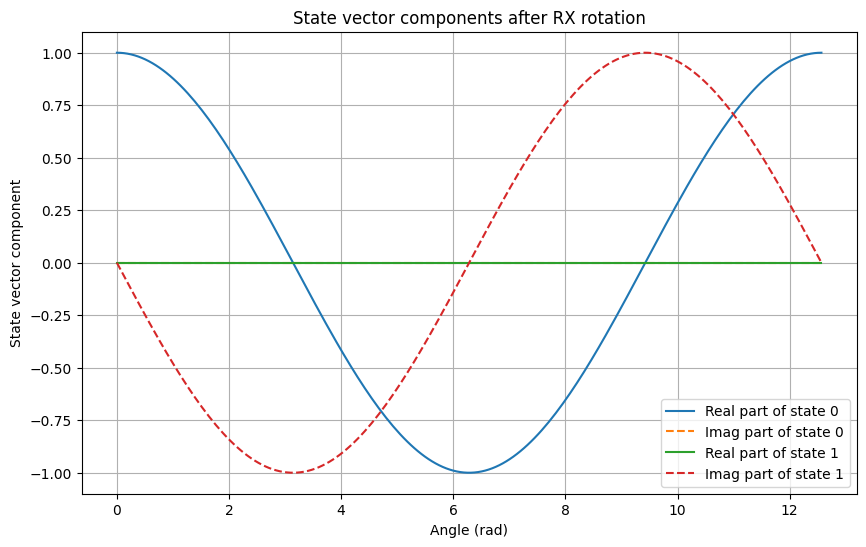

In [14]:
import matplotlib.pyplot as plt
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_rx(theta, state):
    """Apply an RX gate with an angle of theta to a particular basis state.

    Args:
        theta (float): A rotation angle.
        state (int): Either 0 or 1. If 1, initialize the qubit to state |1>
            before applying other operations.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """
    if state == 1:
        qml.PauliX(wires=0)

    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY RX(theta) AND RETURN THE STATE
    qml.RX(theta,0)
    return qml.state()

# Define the plotter function
def plotter(angles, output_states):
    plt.figure(figsize=(10, 6))
    
    # Plot the real and imaginary parts of the state vector components
    for i in range(output_states.shape[1]):
        plt.plot(angles, np.real(output_states[:, i]), label=f'Real part of state {i}')
        plt.plot(angles, np.imag(output_states[:, i]), '--', label=f'Imag part of state {i}')
    
    plt.xlabel('Angle (rad)')
    plt.ylabel('State vector component')
    plt.title('State vector components after RX rotation')
    plt.legend()
    plt.grid(True)
    plt.show()

# Code for plotting
angles = np.linspace(0, 4 * np.pi, 200)
output_states = np.array([apply_rx(t, 0) for t in angles])

plot = plotter(angles, output_states)

## Codercise-I.6.3-Plotting RY

Repeat the above exercise, but using qml.RY. From the amplitudes you obtain for $RY(\theta) \ket{0}$ can you start deducing the matrix form of $RY$ ??

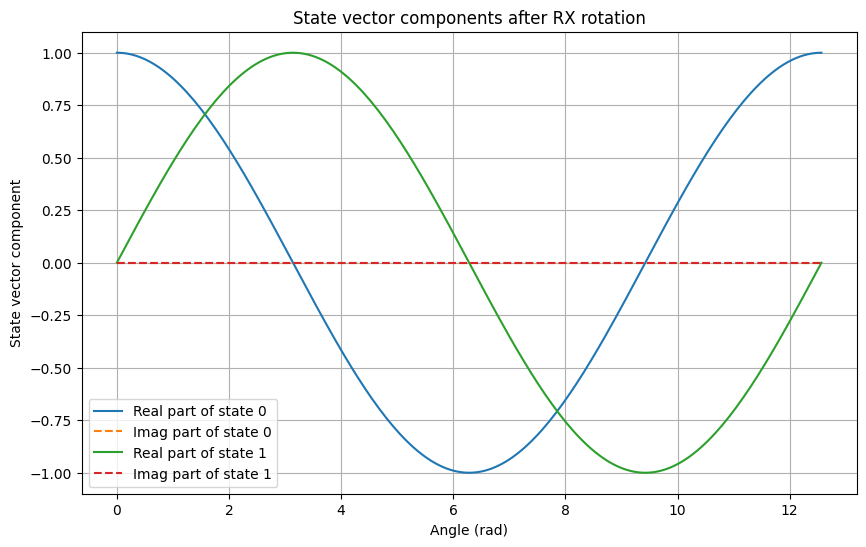

In [13]:
import matplotlib.pyplot as plt
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_ry(theta, state):
    """Apply an RY gate with an angle of theta to a particular basis state.

    Args:
        theta (float): A rotation angle.
        state (int): Either 0 or 1. If 1, initialize the qubit to state |1>
            before applying other operations.

    Returns:
        np.array[complex]: The state of the qubit after the operations.
    """
    if state == 1:
        qml.PauliX(wires=0)

    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY RY(theta) AND RETURN THE STATE
    qml.RY(theta,0)
    return qml.state()

# Define the plotter function
def plotter(angles, output_states):
    plt.figure(figsize=(10, 6))
    
    # Plot the real and imaginary parts of the state vector components
    for i in range(output_states.shape[1]):
        plt.plot(angles, np.real(output_states[:, i]), label=f'Real part of state {i}')
        plt.plot(angles, np.imag(output_states[:, i]), '--', label=f'Imag part of state {i}')
    
    plt.xlabel('Angle (rad)')
    plt.ylabel('State vector component')
    plt.title('State vector components after RX rotation')
    plt.legend()
    plt.grid(True)
    plt.show()


# Code for plotting
angles = np.linspace(0, 4 * np.pi, 200)
output_states = np.array([apply_ry(t, 0) for t in angles])

plot = plotter(angles, output_states)

# Universal Gate Sets

## Codercise-I.7.1-Universality of Rotations

In Codercise I.3.2, you were introduced to the most general single-qubit unitary, which is implemented in PennyLane as qml.Rot. This Rot gate actually applies a sequence of three operations:
```
def decomposed_rot(phi, theta, omega):
    qml.RZ(phi, wires=0)
    qml.RY(theta, wires=0)
    qml.RZ(omega, wires=0)
```
Even though Rot is the most general single-qubit operation, under the hood it's just $RZ$ and RY gates! This means that, together, RZ and RY form a universal gate set for single-qubit operations (as do $RZ$ and $RX$, or $RY$ and $RX$)

Can you find a set of angles ```phi, theta, omega``` such that the sequence of gates
```
    qml.RZ(phi, wires=0)
    qml.RX(theta, wires=0)
    qml.RZ(omega, wires=0)
```
acts the same as a Hadamard gate (up to a global phase)?

In [16]:
dev = qml.device("default.qubit", wires=1)

##################
# YOUR CODE HERE #
##################

# ADJUST THE VALUES OF PHI, THETA, AND OMEGA
phi, theta, omega = np.pi/2, np.pi/2, np.pi/2


@qml.qnode(dev)
def hadamard_with_rz_rx():
    qml.RZ(phi, 0)
    qml.RX(theta, 0)
    qml.RZ(omega, 0)
    
    return qml.state()

print(hadamard_with_rz_rx())

[1.11022302e-16-0.70710678j 0.00000000e+00-0.70710678j]


## Codercise-I.7.2-Synthesizing a Circuit

Rewrite the following circuit over the gate set $[RZ, RX]$ (recall that it is okay for your circuit to work up to a global phase). What is the minimum number of such gates needed to do so?

<img src="https://assets.cloud.pennylane.ai/codebook/circuit_i-7-2.svg" alt="Circuit Image" width="400" height="200"/>

In [20]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def convert_to_rz_rx():
    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT THE CIRCUIT IN THE PICTURE USING ONLY RZ AND RX
    qml.RZ(np.pi/2, 0)
    qml.RX(np.pi/2, 0)
    qml.RZ(np.pi/2, 0)
    qml.RZ(np.pi/2, 0)
    qml.RZ(-np.pi/4, 0)
    qml.RX(np.pi, 0)
    qml.RZ(np.pi, 0)
    
    return qml.state()
print(convert_to_rz_rx())

[-0.27059805+0.65328148j -0.27059805-0.65328148j]


## Codercise-I.7.3-Universality of H and T

The two gates H and T are also a **universal gate set**. By combining just these two gates, we can approximate to arbitrary precision any single-qubit operation (just like we can do with $RZ$ and $RY$ )! Write a PennyLane circuit that applies the unitary matrix ---

This process is called quantum circuit synthesis and is part of the broader subject of quantum compilation. As you will no doubt appreciate after working out this small exercise, designing high-quality, automated compilation tools is an active area of research.

In [18]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def unitary_with_h_and_t():
    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY ONLY H AND T TO PRODUCE A CIRCUIT THAT EFFECTS THE GIVEN MATRIX
    qml.Hadamard(0)
    qml.T(0)
    qml.Hadamard(0)
    qml.T(0)
    qml.T(0)
    qml.Hadamard(0)

    return qml.state()

print(unitary_with_h_and_t())

[0.85355339+0.35355339j 0.35355339+0.14644661j]


# Prepare Yourself

## Codercise-I.8.1-State Preparation

Now that you've learned all about single-qubit gates, you have the tools to perform arbitrary quantum state preparation of a single qubit! State preparation takes place at the start of many algorithms. Given a target state we would like the qubit to be in, we need to figure out the sequence of operations that, acting on $\ket {0}$,  produces the desired state. Furthermore, we ideally want this sequence of operations to be as small as possible.

For this codercise, you will be asked to write a circuit that prepares the quantum state
$$
| \psi \rangle = \frac{1}{\sqrt{2}} |0 \rangle + \frac{1}{\sqrt{2}} e^{\frac{5}{4} i \pi} |1 \rangle
\
$$

up to a global phase using as few gates as possible.

In [7]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def prepare_state():
    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY OPERATIONS TO PREPARE THE TARGET STATE
    qml.Hadamard(0)
    qml.RZ(5*np.pi/4, 0)

    return qml.state()

## Codercise-I.8.2-State Preparation Revisited

Let's have another try. Write a circuit that prepares the quantum state
$$
| \psi \rangle = \frac{\sqrt{3}}{2} |0 \rangle - i \frac{1}{2} |1 \rangle
$$
up to a global phase using as few gates as possible.

In [ ]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def prepare_state():
    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY OPERATIONS TO PREPARE THE TARGET STATE
    qml.RX(np.pi/3, 0)

    return qml.state()

## Codercise-I.8.3-State Preparation with Mottonen's Method

Having done this manually a few times, you might wonder whether there are any automated tools to perform such state preparation. PennyLane contains a library of templates, some of which perform state preparation. Templates are subroutines that can be used in quantum circuits just like any other gate:
```
def my_circuit():
    qml.MyTemplate(parameters, wires)
```
PennyLane contains a template called **MottonenStatePreparation**, which will automatically prepare any normalized qubit state vector, up to a global phase. You need only pass the template a normalized state vector, and a set of wires. This is especially convenient for multi-qubit systems, where it would be challenging to find state preparation circuits by hand.

For this codercise, write a QNode that uses **qml.MottonenStatePreparation** to prepare the state
$$| \psi \rangle = (0.52889389 - 0.149567751i) |0\rangle + (0.67262317 + 0.49545818i) |1\rangle$$
Return the state of the system. In addition, we'll print the circuit using **qml.draw** to investigate which operations were actually used under the hood.

In [23]:
v = np.array([0.52889389 - 0.14956775j, 0.67262317 + 0.49545818j])

##################
# YOUR CODE HERE #
##################

# CREATE A DEVICE
dev = qml.device("default.qubit", wires=1)
@qml.qnode(dev)

# CONSTRUCT A QNODE THAT USES qml.MottonenStatePreparation
# TO PREPARE A QUBIT IN STATE V, AND RETURN THE STATE

def prepare_state(state=v):
    qml.MottonenStatePreparation(v, 0)
    return qml.state()


# This will draw the quantum circuit and allow you to inspect the output gates
print(prepare_state(v))
print(qml.draw(prepare_state, expansion_strategy="device")(v))

[0.52889389-0.14956775j 0.67262317+0.49545818j]
0: ──RY(1.98)──RZ(0.91)──GlobalPhase(-0.18)─┤  State


# Measurements

## Codercise-I.9.1-Measuring a Superposition

So far, we've learned that the different outcome probabilities are related to the amplitudes of a qubit's state vector. If no measurement basis is specified, you can generally assume that measurement is done in the computational basis; this is the default in PennyLane.

Outcome probabilities of the basis states can be returned directly in PennyLane. Rather than putting

```return qml.state()```
at the end of our QNodes, we can swap it out for

```return qml.probs(wires=...)```
Note that we must explicitly specify the wire labels of the qubits we would like to measure.

For this codercise, you will be asked to write a simple circuit that applies a Hadamard gate to either $\ket {0}$ or $\ket {1}$ and returns the measurement outcome probabilities. What do you notice about these probabilities?

In [24]:
dev = qml.device("default.qubit", wires=1)


@qml.qnode(dev)
def apply_h_and_measure(state):
    """Complete the function such that we apply the Hadamard gate
    and measure in the computational basis.

    Args:
        state (int): Either 0 or 1. If 1, prepare the qubit in state |1>,
            otherwise leave it in state 0.

    Returns:
        np.array[float]: The measurement outcome probabilities.
    """
    if state == 1:
        qml.PauliX(wires=0)

    ##################
    # YOUR CODE HERE #
    ##################

    # APPLY HADAMARD AND MEASURE
    qml.Hadamard(0)
    return qml.probs(0)


print(apply_h_and_measure(0))
print(apply_h_and_measure(1))

[0.5 0.5]
[0.5 0.5]


## Codercise-I.9.2-Y Basis Rotation

Suppose we have prepared the state
$$|\psi \rangle = \frac{1}{2} |0 \rangle + i \frac{\sqrt{3}}{2} |1 \rangle$$
and want to make a measurement in the basis
$$| y^+ \rangle = \frac{1}{\sqrt{2}} (|0 \rangle + i|1 \rangle)
\\
| y^- \rangle = \frac{1}{\sqrt{2}} (|0 \rangle - i|1 \rangle)
$$
First, implement a quantum function **prepare_psi** that prepares the state $\ket {\psi}$ Then, determine how to prepare the two basis states $\ket {y^+}$ and $\ket {y^-}$  from $\ket {0}$ and $\ket {1}$ respectively. Implement this as a second quantum function, **y_basis_rotation**. Note that the two functions should not return any values; we will use them as subroutines in a QNode in the next exercise.

Tip. The states $\ket {y^+}$ and $\ket {y^+}$ are given these labels because they are the eigenvectors of the Pauli  operation.

In [32]:
##################
# YOUR CODE HERE #
##################
dev = qml.device("default.qubit", wires=1)
@qml.qnode(dev)
def prepare_and_rotate():
    # Prepare the desired state
    prepare_psi()
    
    # Rotate to the Y-basis
    y_basis_rotation()
    
    # Return the state
    return qml.state()

# WRITE A QUANTUM FUNCTION THAT PREPARES (1/2)|0> + i(sqrt(3)/2)|1>
def prepare_psi():
    qml.RY(2 * np.arctan(np.sqrt(3)), wires=0)
    qml.RZ(np.pi / 2, wires=0)


# WRITE A QUANTUM FUNCTION THAT SENDS BOTH |0> TO |y_+> and |1> TO |y_->
def y_basis_rotation():
    qml.Hadamard(0)
    qml.S(0)


print(prepare_and_measure())


[0.5 0.5]


## Codercise-I.9.3-Measurement in the Y Basis

Using your quantum function from the previous exercise, perform the basis rotation and return the measurement outcome probabilities.

You can call the two functions, **prepare_psi** and **y_basis_rotation**, directly. You do not need to redefine them here.

In [8]:
dev = qml.device("default.qubit", wires=1)

@qml.qnode(dev)

def measure_in_y_basis():
    ##################
    # YOUR CODE HERE #
    ##################
    
    # PREPARE THE STATE
    prepare_psi()
    # PERFORM THE ROTATION BACK TO COMPUTATIONAL BASIS
    # y_basis_rotation()
    qml.adjoint( y_basis_rotation )()
    # RETURN THE MEASUREMENT OUTCOME PROBABILITIES

    return qml.probs(wires = 0)


# WRITE A QUANTUM FUNCTION THAT PREPARES (1/2)|0> + i(sqrt(3)/2)|1>
def prepare_psi():
    qml.StatePrep(np.array([1/2, np.sqrt(3)/2*1j]), wires=0)


# WRITE A QUANTUM FUNCTION THAT SENDS BOTH |0> TO |y_+> and |1> TO |y_->
def y_basis_rotation():
    qml.Hadamard(wires=0)
    qml.S(wires=0)


print(measure_in_y_basis())

[0.9330127 0.0669873]


# What Did You Expect?

## Codercise-I.10.1-Measurement of the PauliY Observable

To compute expectation values of observables in PennyLane, we can simply replace the qml.probs of the previous sections with **qml.expval** and specify the observable to be measured. Common choices are **qml.PauliX**, **qml.PauliY**, and **qml.PauliZ**. The possible outcomes of measuring any Pauli-based expectation value are either  or  as these are their eigenvalues.

To measure an expectation value in PennyLane, we must specify which observable we are measuring, and which wires it acts on. For example, if we wanted to return a measurement of the PauliZ observable acting on a single qubit, we would write -

```
@qml.qnode(dev)
def my_circuit():
    # ...    
    return qml.expval(qml.PauliZ(wires=0))
```

Design and run a PennyLane circuit that performs the following, where  indicates measurement of the PauliY observable.

<img src="https://assets.cloud.pennylane.ai/codebook/exercise_i101.svg" alt="Circuit Image" width="400" height="200"/>

Tip. It is usually more convenient to use the shorthand **qml.PauliZ(0)** when specifying expectation values. Otherwise, the lines of code will get quite long when you get to the multi-qubit case!

In [9]:
dev = qml.device('default.qubit', wires=1)

@qml.qnode(dev)
def circuit():
    ##################
    # YOUR CODE HERE #
    ##################

    # IMPLEMENT THE CIRCUIT IN THE PICTURE AND MEASURE PAULI Y
    qml.RX(np.pi/4,wires=0)
    qml.Hadamard(wires=0)
    qml.PauliZ(wires=0)

    return qml.expval(qml.PauliY(0))

print(circuit())


-0.7071067811865471


## Codercise-I.10.2-Setting up the Number of Experiment Shots

In the previous sections, we computed measurement outcome probabilities and expectation values analytically. Of course, this is impossible to do on hardware. When we run a circuit and take a measurement, we get a single data point that tells us in which state we observed a qubit for a particular run. Since this process is random, in order to get a clearer picture of the statistics we must perform the experiment many, many times. Each time is typically called a shot, or a sample. We can sample from the output distribution in order to estimate expectation values and measurement outcome probabilities in situations where it isn't possible to do so analytically.

In PennyLane, the number of shots to take during an experiment is specified upon device construction:

dev = qml.device('default.qubit', wires=1, shots=1000)
In the code below is a list of possible numbers of shots. For each value, initialize a device, then create a QNode that runs the circuit from the previous exercise (reproduced below for convenience). What happens to the expectation value as you increase the number of shots?
<img src="https://assets.cloud.pennylane.ai/codebook/exercise_i101.svg" alt="Circuit Image" width="400" height="200"/>

In [10]:
# An array to store your results
shot_results = []

# Different numbers of shots
shot_values = [100, 1000, 10000, 100000, 1000000]

for shots in shot_values: 
    ##################
    # YOUR CODE HERE #
    ##################

    # CREATE A DEVICE, CREATE A QNODE, AND RUN IT
    dev = qml.device('default.qubit', wires=1,shots=shots)
    @qml.qnode(dev)
    def circuit():
    # IMPLEMENT THE CIRCUIT IN THE PICTURE AND MEASURE PAULI Y
        qml.RX(np.pi/4,wires=0)
        qml.Hadamard(wires=0)
        qml.PauliZ(wires=0)
        return qml.expval(qml.PauliY(0))
        
    # STORE RESULT IN SHOT_RESULTS ARRAY
    shot_results.append(circuit())

print(qml.math.unwrap(shot_results))

[-0.78, -0.704, -0.7108, -0.71076, -0.707014]


## Codercise-I.10.3-Evaluating the Samples

We can use the sample results to compute the expectation value in the same way as we would normally take a weighted average, i.e.,

$$\langle Y \rangle = \frac{1 \times (\text{number of } 1s) + (-1) \times (\text{number of } -1s)}{\text{number of shots}}$$

In PennyLane, we can access samples directly by returning qml.sample rather than qml.expval.
```
@qml.qnode(dev)
def my_circuit():
    # ...    
    return qml.sample(qml.PauliZ(wires=0))
```
Using the circuit from earlier, replace the qml.expval measurement with qml.sample. Then, write a function to compute an estimate of the expectation value based on the samples.

In [11]:
dev = qml.device("default.qubit", wires=1, shots=100000)

@qml.qnode(dev)
def circuit():
    qml.RX(np.pi/4, wires=0)
    qml.Hadamard(wires=0)
    qml.PauliZ(wires=0)

    ##################
    # YOUR CODE HERE #
    ##################

    # RETURN THE MEASUREMENT SAMPLES OF THE CORRECT OBSERVABLE

    return qml.sample(qml.PauliY(0))


def compute_expval_from_samples(samples):
    """Compute the expectation value of an observable given a set of 
    sample outputs. You can assume that there are two possible outcomes,
    1 and -1. 
    
    Args: 
        samples (array[float]): 100000 samples representing the results of
            running the above circuit.
        
    Returns:
        float: the expectation value computed based on samples.
    """

    estimated_expval = 0

    ##################
    # YOUR CODE HERE #
    ##################

    # USE THE SAMPLES TO ESTIMATE THE EXPECTATION VALUE
    
    # Soma-se todos os elementos do vetor 
    for sample in samples:
        estimated_expval = estimated_expval + sample
    
    # Retorna a media ponderada dos valores dos valores 
    return estimated_expval/100000

samples = circuit()
print(compute_expval_from_samples(samples))

-0.70848


## Codercise-I.10.4-The Variance of Sample Measurements

Each time you run the code block in the previous codercise, you'll obtain a different set of samples, and thus a different estimate for the expectation value. An interesting question is, given a certain number of shots, how close should we expect to get?

Using the code below as a starting point, explore how the accuracy of the expectation value depends on the number of shots. For example, if we run 100 experiments with 100 shots each, what are the mean and variance of the distribution of expectation values obtained? How does this variance scale with the number of shots?

To accomplish this, we will use a very simple circuit that consists of a Hadamard and a measurement of the **qml.PauliZ** observable, which will allow us to directly extract the dependence of the variance on the number of shots. We will plot your results; based on the plot, complete the **variance_scaling** function below to define the relationship between variance and shots.

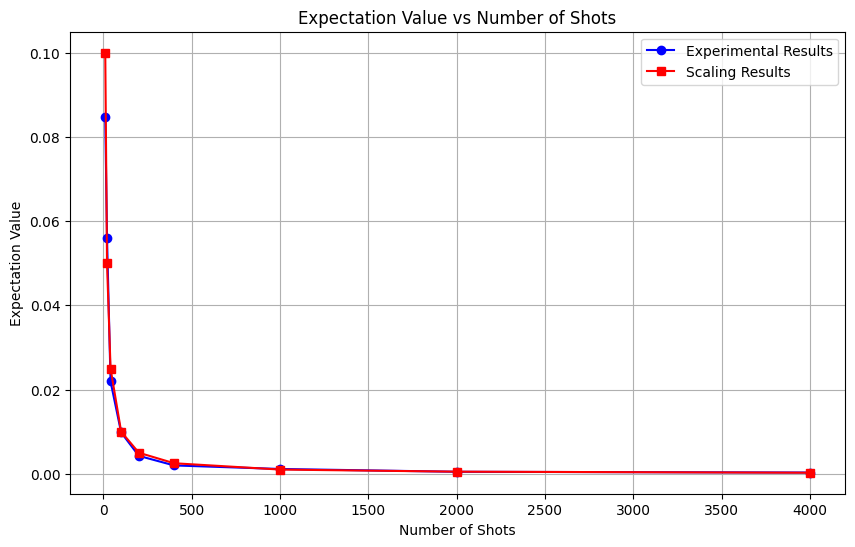

In [15]:
import matplotlib.pyplot as plt

def variance_experiment(n_shots):
    """Run an experiment to determine the variance in an expectation
    value computed with a given number of shots.
    
    Args:
        n_shots (int): The number of shots
        
    Returns:
        float: The variance in expectation value we obtain running the 
        circuit 100 times with n_shots shots each.
    """

    # To obtain a variance, we run the circuit multiple times at each shot value.
    n_trials = 100

    ##################
    # YOUR CODE HERE #
    ##################

    # CREATE A DEVICE WITH GIVEN NUMBER OF SHOTS
    dev = qml.device("default.qubit", wires=1, shots=n_shots)

    # DECORATE THE CIRCUIT BELOW TO CREATE A QNODE
    @qml.qnode(dev)
    def circuit():
        qml.Hadamard(wires=0)
        return qml.expval(qml.PauliZ(wires=0))

    # RUN THE QNODE N_TRIALS TIMES AND RETURN THE VARIANCE OF THE RESULTS
    resultado = 0
    resultadoSomaSimples = 0
    resultadoSomaQuadrado = 0
    for i in range(n_trials):        
        # calculando o valor esperado diretamente da definicao de variancia:
        # valor_esperado = medias_dos_quadrados - quadrado_da_media 
        # Em simbolos : sigma² = <X²> - <X>²         
        resultado = circuit()
        resultadoSomaSimples = resultadoSomaSimples + resultado    
        resultadoSomaQuadrado = resultadoSomaQuadrado + resultado**2    
    return resultadoSomaQuadrado/n_trials - (resultadoSomaSimples/n_trials)**2

    

def variance_scaling(n_shots):
    """Once you have determined how the variance in expectation value scales
    with the number of shots, complete this function to programmatically
    represent the relationship.
    
    Args:
        n_shots (int): The number of shots
        
    Returns:
        float: The variance in expectation value we expect to see when we run
        an experiment with n_shots shots.
    """

    estimated_variance = 0

    ##################
    # YOUR CODE HERE #
    ##################

    # ESTIMATE THE VARIANCE BASED ON SHOT NUMBER
    # Os pontoa plotados indicam que podemos estimar o valor por um funcao que é inversamente proporcional ao numero de disparos (n_shots)
    estimated_variance = 1/n_shots
    return estimated_variance

# Various numbers of shots; you can change this
shot_vals = [10, 20, 40, 100, 200, 400, 1000, 2000, 4000]

def plotter(shot_vals, results_experiment, results_scaling):
    """
    Plots the results of an experiment and scaling results against the number of shots.

    Args:
        shot_vals (list or array): The number of shots used in the experiments.
        results_experiment (list or array): The experimental results for each number of shots.
        results_scaling (list or array): The scaling results for each number of shots.

    Returns:
        None
    """
    plt.figure(figsize=(10, 6))
    plt.plot(shot_vals, results_experiment, 'o-', label='Experimental Results', color='blue')
    plt.plot(shot_vals, results_scaling, 's-', label='Scaling Results', color='red')
    
    plt.xlabel('Number of Shots')
    plt.ylabel('Varience')
    plt.title('Varience vs Number of Shots')
    plt.legend()
    plt.grid(True)
    plt.show()

# Used to plot your results
results_experiment = [variance_experiment(shots) for shots in shot_vals]
results_scaling = [variance_scaling(shots) for shots in shot_vals]
plot = plotter(shot_vals, results_experiment, results_scaling)